── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“ggrepel: 468 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


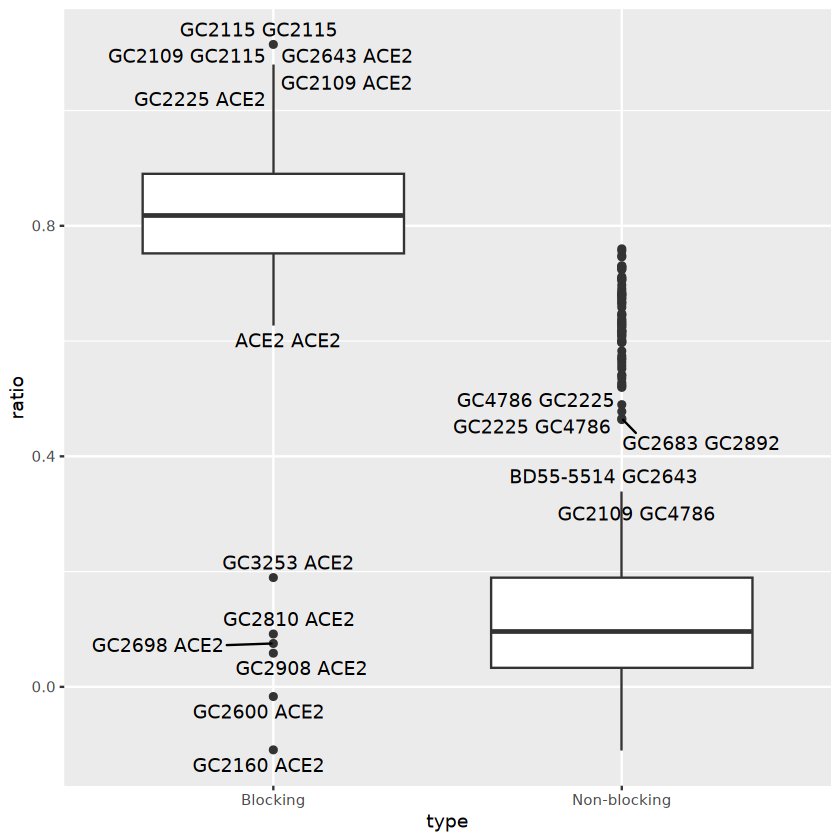

In [1]:
library(ggplot2)
library(tidyverse)
library(ggrepel)

data <- read.csv("../data/SPR/competition/SPR_competition_data_20240407.csv")

protein_capture <- data[,c('protein1', 'binding1')] %>% group_by(protein1) %>% summarise(p2_capture=mean(binding1))

data <- merge(data, protein_capture, by.x='protein2', by.y='protein1', all = T)
data$ratio <- 1.0-data$binding2/data$p2_capture
data$proteins <- paste(pmin(data$protein1, data$protein2), pmax(data$protein1, data$protein2), sep='_')
ggplot(data, aes(type, ratio))+geom_boxplot()+geom_text_repel(aes(label=paste(protein1, protein2)))

Warning message:
“ggrepel: 238 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


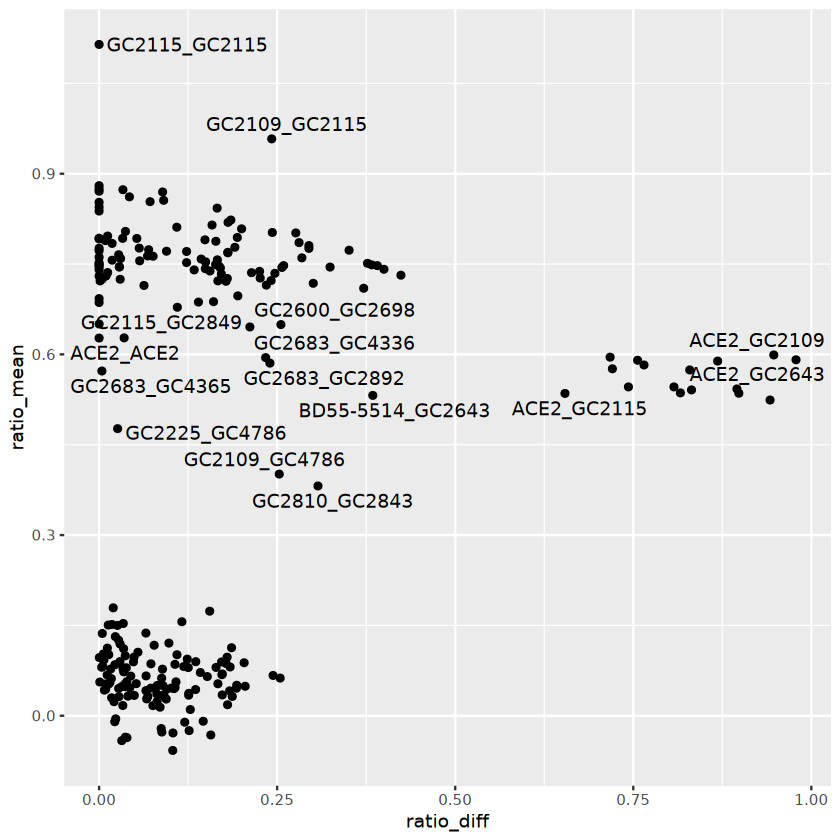

In [2]:
ggplot(data %>% group_by(proteins) %>% summarise(ratio_mean=mean(ratio), ratio_diff=max(ratio)-min(ratio)), aes(x=ratio_diff, y=ratio_mean))+geom_point()+geom_text_repel(aes(label=proteins))


In [14]:
ht <- as.data.frame(data %>% pivot_wider(id_cols = protein1, names_from = protein2, values_from = ratio))
rownames(ht) <- ht$protein1
ht <- as.matrix(ht[,-1])
library(ComplexHeatmap)
library(circlize)

dev.off()
x <- hclust(dist(ht))
col_fun = colorRamp2(c(0, 1), c("#FFFFFF","#EE0000"))
ht <- ht[x$order,]
ht <- ht[,rownames(ht)]

groups <- factor(read.csv("../data/SPR/competition/info.csv", row.names=1)[rownames(ht), 'group'], levels=c('ACE2', 'F3', 'A1', 'A2', 'B', 'C/D1', 'D4', 'D3', 'E1/E2.1', 'E2.2', 'E3', 'F1.1','F1.2'))

pdf("../plots/Extended/SPR_competition_heatmap.pdf", width=7, height=6)
Heatmap(
    t(ht), cluster_rows = F, cluster_columns = F, na_col = "#666666",
        column_split=groups, row_split=groups, border=T,col=col_fun
)

dev.off()

null device 
          1

png 
  2